In [35]:
from sklearn import datasets as skds
from sklearn import model_selection as skms
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import preprocessing as skpp

In [2]:
X, y = skds.make_regression(n_samples=200,
                            n_features=1,
                            n_informative=1,
                            n_targets=1,
                            noise=25.0)

In [3]:
if(y.ndim == 1):
    y = y.reshape(-1,1)

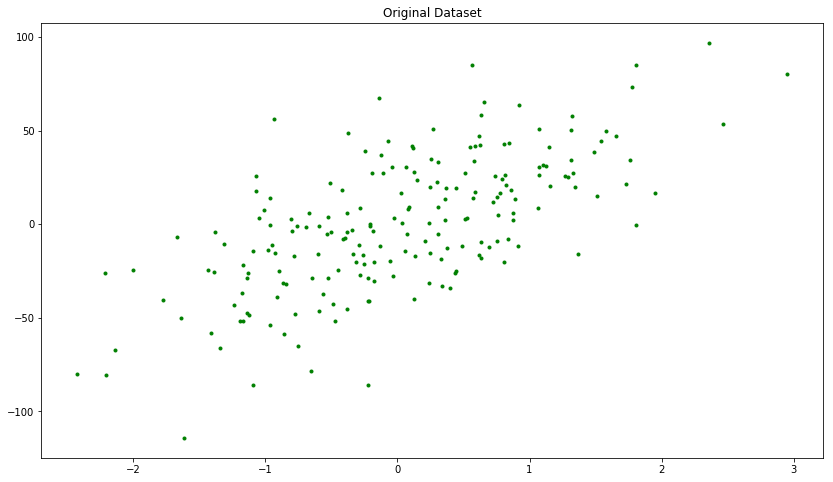

In [4]:
plt.figure(figsize=(14,8))
plt.plot(X,y,'g.')
plt.title('Original Dataset')
plt.show()


In [5]:
# prepping the the data for train and test 
X_train, X_test, y_train, y_test = skms.train_test_split(X,y,
                                                         test_size=.4,
                                                         random_state=123)


In [6]:
# defining the model nodes
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]


x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

# defining the model architecture
model = tf.matmul(x_tensor, w) + b

In [7]:
loss = tf.reduce_mean(tf.square(model - y_tensor))
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [15]:
learning_rate = .001
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [16]:
num_epochs = 1500
w_hat = 0
b_hat = 0
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0
rs_score = 0


In [17]:


with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict=feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

    w_hat, b_hat = tfs.run([w, b])
    w_hat = w_hat.reshape(1)

print('model : Y = {0:.8f} X + {1:.8f}'.format(w_hat[0], b_hat[0]))
print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

model : Y = 23.81241035 X + -0.95738548
For test data : MSE = 605.94427490, R2 = 0.46724713 


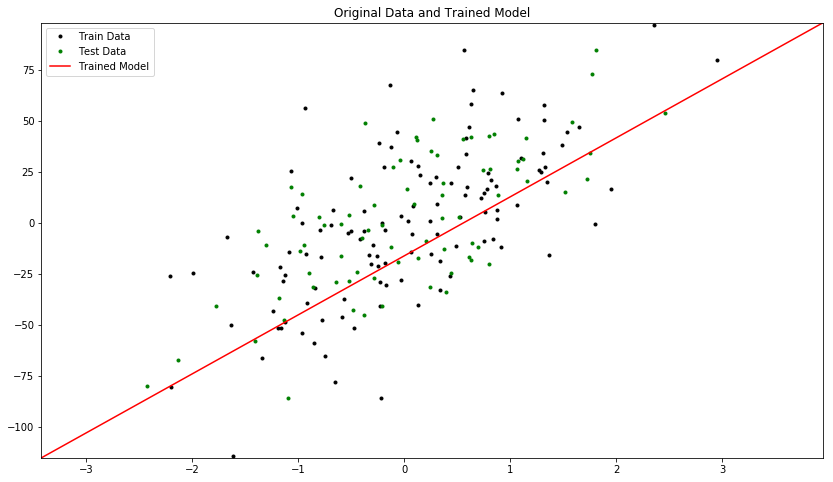

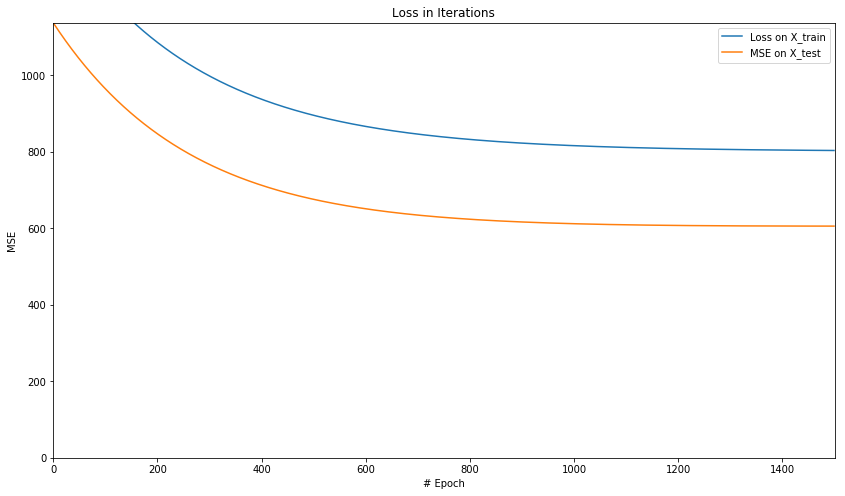

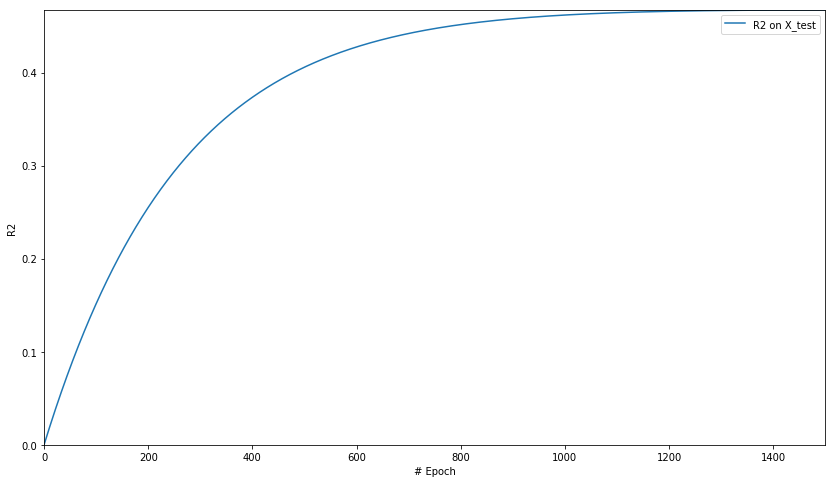

In [31]:
plt.figure(figsize=(14, 8))
plt.title('Original Data and Trained Model')

x_plot = [np.min(X) - 1, np.max(X) + 1]
y_plot = [np.min(y) - 1, np.max(y) + 1]# w_hat * x_plot + b_hat
plt.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plt.plot(X_train, y_train, 'k.', label='Train Data')
plt.plot(X_test, y_test, 'g.', label='Test Data')
plt.plot(x_plot, y_plot, 'r-', label='Trained Model')
plt.legend()
plt.show()

plt.figure(figsize=(14,8))
plt.axis([0,num_epochs,0,np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.axis([0,num_epochs,0,np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(14,8))
plt.axis([0,num_epochs,0,np.max(rs_epochs)])
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()

# Multivariable Regression

In [32]:
boston=skds.load_boston()
print(boston.DESCR)
X=boston.data.astype(np.float32)
y=boston.target.astype(np.float32)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [36]:
if (y.ndim == 1):
    y = y.reshape(len(y),1)
X = skpp.StandardScaler().fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y, test_size=.4, random_state=123)
print(X_train.shape)

(303, 13)


In [38]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(
    dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(
    tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [39]:
# vanilla regression
loss = tf.reduce_mean(tf.square(model - y_tensor))
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [40]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [41]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 30.48501396, R2 = 0.64172256 


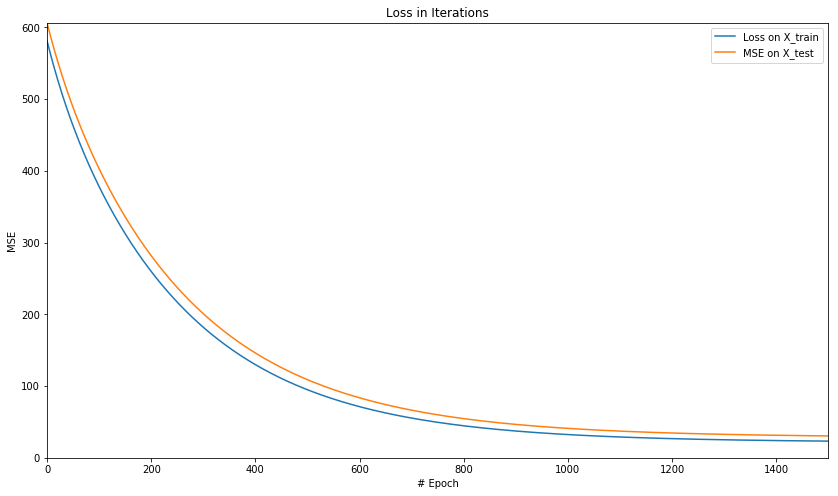

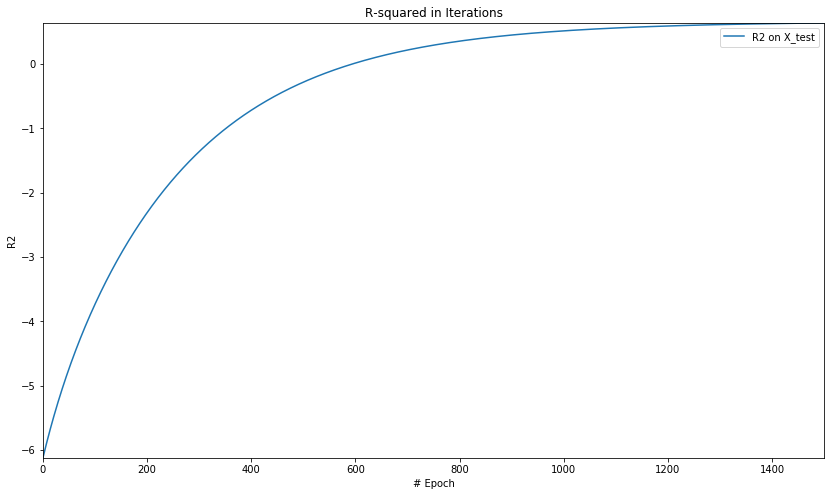

In [42]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

# Lasso (L1) reguralization

In [43]:
lasso_param = tf.Variable(0.8, dtype=tf.float32)
lasso_loss = tf.reduce_mean(tf.abs(w)) * lasso_param

In [44]:
# lasso reguralization
loss = tf.reduce_mean(tf.square(model - y_tensor)) + lasso_loss
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [45]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [46]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [47]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 30.48978615, R2 = 0.64166641 


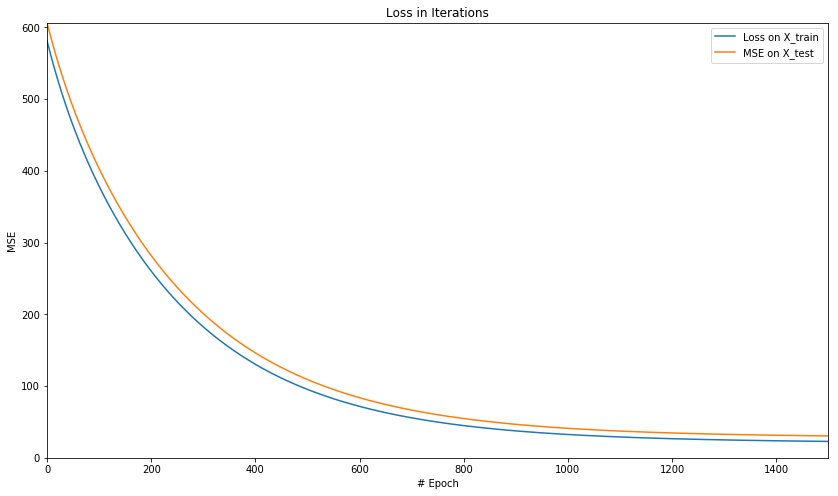

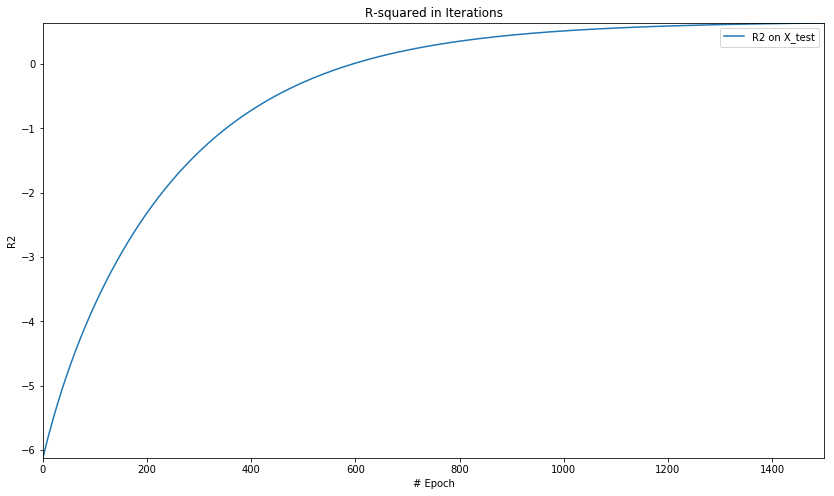

In [48]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

# Ridge reguralization

In [49]:
ridge_param = tf.Variable(0.8, dtype=tf.float32)
ridge_loss = tf.reduce_mean(tf.square(w)) * ridge_param

In [50]:
# ridge reguralization
loss = tf.reduce_mean(tf.square(model - y_tensor)) + lasso_loss
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [51]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [52]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [53]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 30.48978615, R2 = 0.64166641 


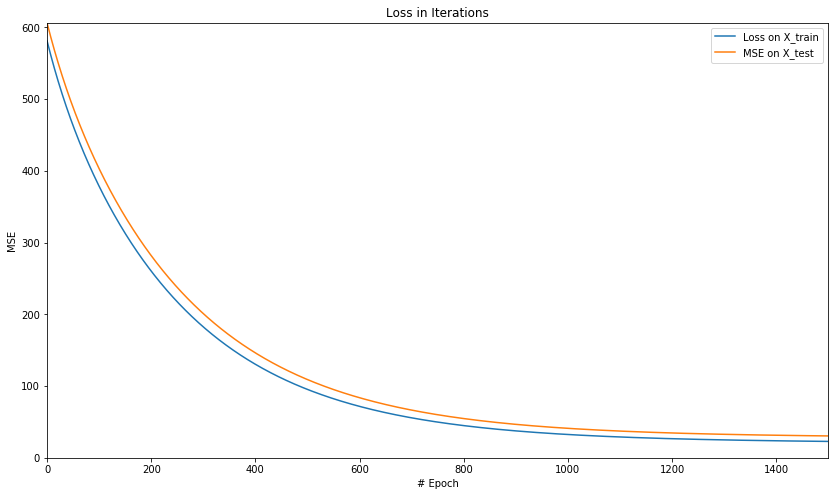

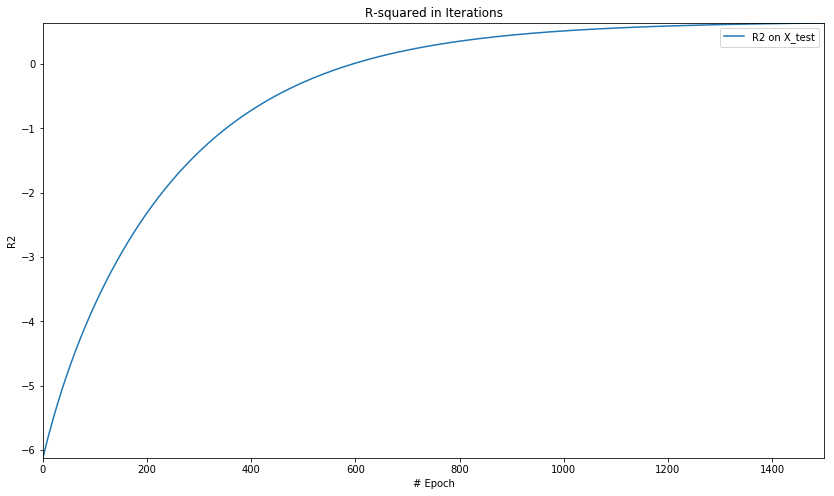

In [54]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

# ElasticNet (L1) reguralization

In [55]:
ridge_param = tf.Variable(0.8, dtype=tf.float32)
ridge_loss = tf.reduce_mean(tf.square(w)) * ridge_param
lasso_param = tf.Variable(0.8, dtype=tf.float32)
lasso_loss = tf.reduce_mean(tf.abs(w)) * lasso_param



In [56]:
# elasticnet reguralization
loss = tf.reduce_mean(tf.square(model - y_tensor)) + ridge_loss + lasso_loss
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [57]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [58]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

In [59]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

For test data : MSE = 30.64862442, R2 = 0.63979971 


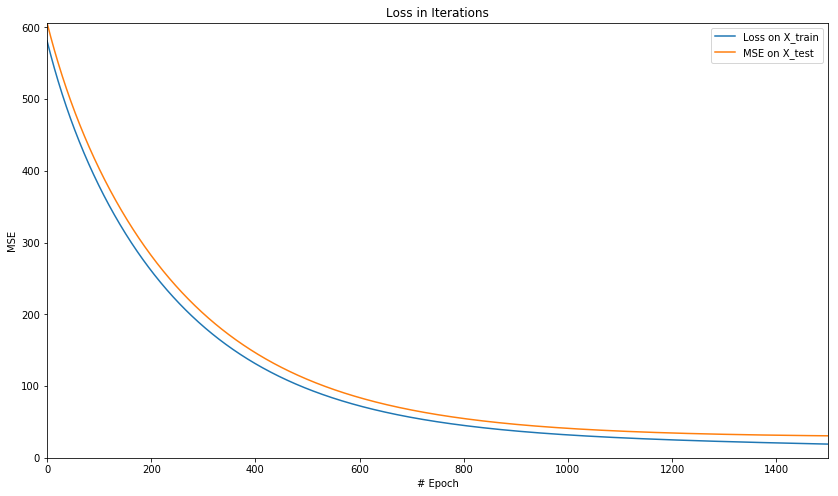

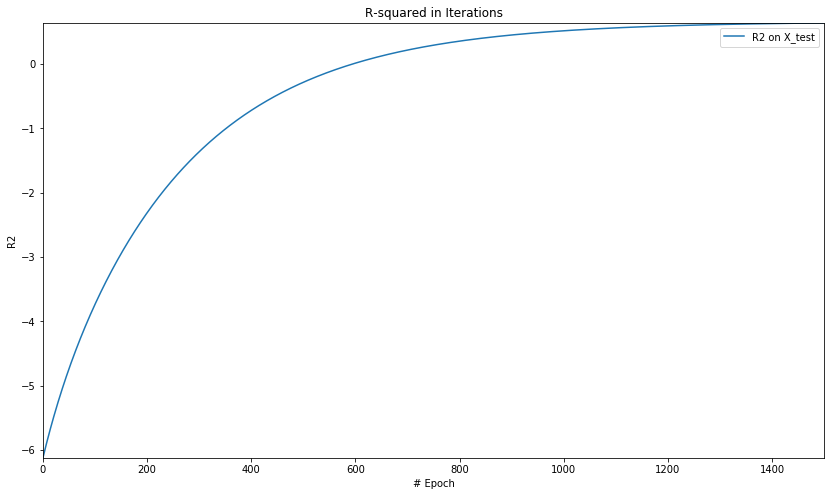

In [60]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()